#### <a id='top'></a>

# Homework 4: Bayes' for Days
***

**Name**: Nikolai Lyssogor

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (15 pts) Problem 1: Theory (Bayes)
***



To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *hypothesis* that has a 12% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *hypothesis* is true is 40%
    2) The probability that they incorrectly *find* an important result given that their *hypothesis* is false is 5%

If they *find* an important result they are published.  What is the probability that their *hypothesis* was true, given that they were published?

Let $P(H)$ denote the probability that that a research hypothesis is correct. $P(E)$ will denote the probability that the study referred to gets published. We are given that $P(H) = 12\%$. For this study, if the authors are published, there is a 40% chance their hypothesis was correct i.e. $P(H|E) = 40\%$. The probability the original hypothesis was wrong given the study was published is $P(~H|E) = 5\%$. The probability that the authors' hypothesis was true, given they were published is $$P(H|E) = \frac{P(H)P(E|H)}{P(H)P(E|H) + P(~H)P(E|~H)} = 52.2\%$$

[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Iterative Bayes)
***

You have decided you want to play a game with your roommate. Since you're both in Introduction to Data Science, you have your big bag of mixed dice, and you know you can do something interesting with dice!

Unfortunately, you're trying to play while you bake (or maybe you've just come down with the chicken pox like Phoebe), so you're playing while wearing oven mitts that you simply cannot remove. Because of this fact, you can use your hands to pull dice from the bag, but cannot feel the dice.

<img style="width: 200px; padding: 3mm;" src="https://img.sharetv.com/shows/episodes/standard/204702.jpg" alt="Phoebe with chicken pox in oven mitts"/>

Double unfortunately, you've been trapped in these oven mitts while wearing your ultra comfortable Ostrich Pillow because you were napping! Because of this fact, you also cannot see the dice you pull from the bag.

<img style="width: 200px; padding: 3mm;" src="https://i.pinimg.com/originals/d7/a3/6a/d7a36ab2216276c17c1b8b575fccad54.jpg" alt="Phoebe with chicken pox in oven mitts"/>

Are you neither baking nor chicken poxed, and your roommate perhaps orchestrated this scenario to make this absurd situation arise? Who can say!

In your collection, you own:
* 20 fair six-sided dice (**S**), with faces `{1,2,3,4,5,6}`.
* 15 fair eight-sided dice (**E**), with faces `{1,2,3,4,5,6,7,8}`.
* 3 fair twenty-sided dice(**T**) (faces `{1,2,3,4,...,19,20}`).
* 2 fair one-hundred-sided dice (**H**) (faces `{1,2,3,4,...,99,100}`).

You and your roommate start to invent a game: you will blindly pull a die from the bag, roll the die, and your roommate will tell you what the result is. You will then guess how many sides - six, eight, twenty, or one hundred - the die you pulled has, and allocate points accordingly.

But how many points are appropriate? _You'll need to figure out some probabilities here to determine what's fair!_

Work the following problems by hand (or glove) for **Parts A through D and Part G** (but don't be afraid to simulate to check your result!). In **Parts E and F**, follow the instructions as written.

***
**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

For each type of die, we will sum the probability that that type of die is selected times the probability that that die rolls a 7 $$\sum_{i=1}^{4} P(D)P(R_7) = (20/40)(0) + (15/40)(1/8) + (3/40)(1/20) + (2/40)(1/100) = .0511$$ where P(D) is the probability that a particular die type is selected.

***
**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die (**E**)? 

We want to calculate the probability you chose from bag **E** given you rolled a 7. This is given by:  $$P(E|R_7) = \frac{P(E)P(R_7|E)}{P(R_7)} = \frac{(15/40)(1/8)}{.0511} = .9169$$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

Since there are ways to roll a 7 that do not involve having picked from bag $E$, events $R_7$ and $E$ are not independent. In mathier terms, $P(R_7|E) \neq P(R_7)$ as shown in the above two questions.

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or higher you did *not* pick a Six-sided die,  if you roll a 9 or higher you did not pick a Six-sided or an Eight-sided, and if you roll a 21 or higher you must have picked a One-hundred-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one possible outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

We want to divide the probability you select a six-sided die AND roll a 1-6 by the sum of the probabilities you select each of the types of die AND roll a 1-6 with it. This is given by: $$P(S | L_1) = \frac{P(S)P(L_1 | S)}{P(S)P(L_1 | S) + P(E)P(L_1 | E)  + \dots} = \frac{(20/40)(1)}{(20/40)(1) + (15/40)(6/8) + (3/40)(6/20) + (2/40)(6/100)} = .6198$$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

The only part of the equation in **Part D** that changes once we roll the die more times is the value which accounts for the liklihood of rolling a 1 - 6 successively. The probabilities of selecting a particular die type stay the same. Thus, we have $$P(S | L_n) = \frac{P(S)P(L_1 | S)}{P(S)P(L_1 | S)^n + P(E)P(L_1 | E)^n  + \dots}$$

In [7]:
def prob_six(n):
   chooseSix = .5
   chooseEight = .375
   chooseTwenty = .075
   chooseHundred = .05
    
   eightRollSix = .75
   twentyRollSix = .3
   hundredRollSix = .06
        
   return chooseSix / (chooseSix + chooseEight * eightRollSix ** n + chooseTwenty * twentyRollSix ** n + chooseHundred * hundredRollSix ** n)

ans = prob_six(1)
print("n = 1: %f" % ans)

n = 1: 0.619771


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [12]:
print("5 rolls: %f" % prob_six(5))
print("8 rolls: %f" % prob_six(8))
print("9 rolls: %f" % prob_six(9))
print("10 rolls: %f" % prob_six(10))

5 rolls: 0.848649
8 rolls: 0.930151
9 rolls: 0.946686
10 rolls: 0.959476


We see that 10 rolls are required for a greater than 95% chance that the die grabbed is six-sided.

**Part G (BONUS 5 Points):** Now that you have looked at the probability space of your dice bag, outline the rules you would establish for this dice rolling game to make it _actually fun_, or at least somewhat fair. For example, would you allow or disallow rerolling the same die? Would you assign more points for correctly guessing a rarer die, or keep them equal? Would you create a turn-taking system where you pass the oven mitts and Ostrich Pillow back and forth, or give the roller points based on incorrect guesses? Would you implement other ideas? There's a limitless space for invention here - simply discuss how you would add a few rules (at least 3), and how those rules are based on the findings above (or run more probability calculations or simulations below to explore the space).

**Typeset your solution for Problem 2G in this cell or cells.**

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation (Stochastic Integration)
***

One really cool application of random variables is using them to approximate integrals/areas - an extension of the estimation of $\pi$ done in nb04.  The random method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we *never* want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on an integral that we could do by hand. 

**Part A.**  Let $L$ be a random variable representing how happy your new desk plant, Fernoulli Jr., is today.  It's measured by the **Lushness Index** (LI).  Suppose the probability density function for $L$ is on a scale from zero to one, and is described by an arcsine function:

$$
f_L(a) = \begin{cases}
         \left(\frac{1}{\frac{\pi}{2}-1}\right)\sin^{-1}(a) & 0 \leq a \leq 1 \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Lushness Index of 1 means Fernoulli Jr. is feeling  well-watered, content, and ready to perform binary statistical experiments.  A Lushness Index of 0 means that your plant is really in need of some more sunlight.  



Compute **by hand**, the integral of $f(a)$ for $0 \leq a \leq 1/2$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

*Hint*: this is classically an integral that makes use of the fact that $\frac{d}{dx} \sin^{-1}(x)=\frac{1}{\sqrt{1-x^2}}$.  That sounds like *"part"* of the solution.  You should also probably make sure you take a look at the plot of $f$, making mental note of it's minima, maxima, etc. over that interval.

Given: 
$$\int_{0}^{1/2}\frac{\sin^{-1}(a)}{\frac{\pi}{2}-1}$$
Move the constant outside the integral:
$$\frac{1}{{\frac{\pi}{2}-1}}\int_{0}^{1/2}\sin^{-1}(a)$$
Perform integration by parts:
$$u = \sin^{-1} \hspace{1cm} du = \frac{da}{\sqrt{1-a^2}}$$
$$dv = 1da \hspace{1cm} v = a$$
$$\frac{1}{{\frac{\pi}{2}-1}}(a\sin^{-1}(a) - \int\frac{x}{\sqrt{1-x^2}}dx) |_{0}^{1/2}$$
Let $w = 1 - x^2 \hspace{1cm} ada = -1/2dw$ 
$$\frac{1}{{\frac{\pi}{2}-1}}(a\sin^{-1}(a) - \int\frac{-dw}{\sqrt{w}})$$
$$\frac{1}{{\frac{\pi}{2}-1}}(a\sin^{-1}(a) + \sqrt{w})$$
Substitute $a$ back in:
$$\frac{1}{{\frac{\pi}{2}-1}}(a\sin^{-1}(a) + \sqrt{1 - a^2})|_{0}^{1/2}$$
$$\frac{1}{{\frac{\pi}{2}-1}}(1/2\sin^{-1}(1/2) + \sqrt{1 - (1/2)^2}) - \frac{1}{{\frac{\pi}{2}-1}}(0\sin^{-1}(0) + \sqrt{1 - 0^2}) = .2239$$
In general, the integral of a probability density function is the cumulative probability. In this problem, the probability that Fernoulli Jr's lushness index is .5 or less on any given day is .2239

**Part B.** What is the maximum of $f_L(a)$ over the interval $[0,1]$?  For the rest of the problem, we will refer to this value by $m$.

The maximum of $f_L(a)$ is $m = \frac{sin^{-1}(1)}{\frac{\pi}{2} - 1} = 2.7519$

**Part C.** Suppose we sample a continuous uniform random variable $X\sim U(0,1/2)$ and another  random variable $Y \sim U(0,m)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,1/2] \times [0,m]$, or inside the box composed of all points $\{(x,y)\,|\, x \in [0,1/2], y \in [0,m]\}.$  

If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The ratio gives us the percentage of random coordinates that should fall under the curve. 

**Part D.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

The ratio of the area of the integral to the area formed by the upper bound and $m$ is equal to the ratio of the number of random coordinates that fall below the curve to the total number of random coordinates simulated. So to solve for the integral we just multiply the second ratio by the area above and below the curve.  

**Part E.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $1$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,m)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [85]:
# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
def integrate(num_samples, ub, isPlot):
    num_below_curve = 0
    m = np.arcsin(1) / ((math.pi / 2) - 1)
    total_area = ub * m
    sample_var_arr = []
    sample_var = 0
    
    x_below = []
    y_below = []
    x_above = []
    y_above = []
    
    for i in range(num_samples):
        # pick random coordinate in the appropriate range
        x = np.random.uniform(low=0, high=ub)
        y = np.random.uniform(low=0, high=m)
        # note variance for each random point
        sample_var += (y - (np.arcsin(x) / ((math.pi / 2) - 1)))**2
        # see if the random point falls below the curve
        if y < np.arcsin(x) / ((math.pi / 2) - 1):
            num_below_curve += 1
            # values for plotting later
            x_below.append(x)
            y_below.append(y)
        else:
            # values for plotting later
            x_above.append(x)
            y_above.append(y)
            
    # estimate the integral from ratio of number of hits:misses        
    estimate = (num_below_curve / num_samples) * total_area
    sample_var = sample_var / (num_samples - 1)
    
    # plot it!
    if isPlot == True:
        fig = plt.figure(figsize = (12, 6))
        ax1 = fig.add_subplot(111)
        x = np.arange(0.0, 1.0, 0.0001)
        y = np.arcsin(x) / ((math.pi / 2) - 1)

        ax1.scatter(x_below, y_below, c='green', label='coordinates under curve')
        ax1.scatter(x_above, y_above, c='red', label='coordinates above curve')
        ax1.plot(x, y)
        
        ax1.grid()
        plt.legend(loc='upper left');
        plt.show()

    return estimate, sample_var

**Part F.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`1?  (Is this actually a valid pdf?) Set that as `int_0_to_1` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test involves randomness, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [18]:
# Part 3F Code
int_0_to_0  = 0 # fill this in!
int_0_to_1 = 1 # this one too!


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, 1, False)[0],int_0_to_1,abs_tol=0.03), "Error: upper endpoint test failing"

(0.22497096370002592, 1)


If the upper bound is zero, we are evaluating $\int_{0}^{0}\frac{\sin^{-1}(x)}{\frac{\pi}{2} - 1}$. This should, of course, always be zero since the area of a rectangle with either its height or width equal to zero is zero. The second test is evaluating $\int_{0}^{1}\frac{\sin^{-1}(x)}{\frac{\pi}{2} - 1}$, which should equal one because the integral of all probability density functions from $-\infty$ to $\infty$ is equal to one. 

**Part G.** Run your simulation with `isPlot=True` and `ub=`$1$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**?  As a whole, what advantage does this process offer over actually doing the integral by hand?

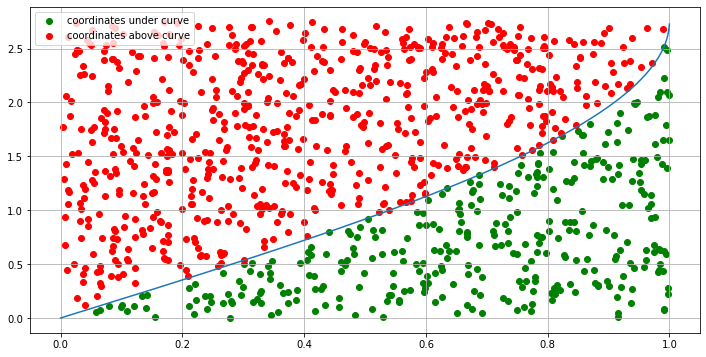

samples=10000, ub=.5: 0.223320,1.565235


In [86]:
integrate(1000, 1, True)
print("samples=10000, ub=.5: %f,%f" % integrate(10000, .5, False))

The simulation usually calculates the integral to within .001 of the actual value calculated in Part A. This technique is useful if the integral you are concerned with is extremely difficult or impossible to calculate by hand. It is also useful if you didn't pay attention when you were supposed to be learning calculus and instead now have to rely on high-octane guess and check to get the job done.